In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
# Constants
IMG_SIZE = (64, 64)  # Resized from 300x300
BATCH_SIZE = 32
DATA_DIR = "malayalam_dataset"
MODEL_PATH = "my_model.keras"

In [ ]:




# 1. Load Data
train_dir = os.path.join(DATA_DIR, "train")
test_dir = os.path.join(DATA_DIR, "test")

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)





Found 10 images belonging to 11 classes.
Found 10 images belonging to 11 classes.


In [ ]:
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

EXPECTED_INPUT_SHAPE = (64, 64, 1)  # Match this to your resized image shape

# Check and load or rebuild model
def build_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Load or rebuild
if os.path.exists(MODEL_PATH):
    try:
        model = load_model(MODEL_PATH)
        # Check input shape
        if model.input_shape[1:] != EXPECTED_INPUT_SHAPE:
            raise ValueError(f"Model input shape mismatch. Expected {EXPECTED_INPUT_SHAPE}, got {model.input_shape[1:]}")
        print("✅ Loaded existing model.")
    except Exception as e:
        print(f"⚠️ Error loading model: {e}\n🔁 Rebuilding...")
        os.remove(MODEL_PATH)
        model = build_model(EXPECTED_INPUT_SHAPE, train_data.num_classes)
        model.fit(train_data, validation_data=test_data, epochs=10)
        model.save(MODEL_PATH)
        print("✅ Model rebuilt and saved.")
else:
    model = build_model(EXPECTED_INPUT_SHAPE, train_data.num_classes)
    model.fit(train_data, validation_data=test_data, epochs=10)
    model.save(MODEL_PATH)
    print("✅ Model trained and saved.")


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.1000 - loss: 2.3979 - val_accuracy: 0.1000 - val_loss: 2.3977
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.1000 - loss: 2.3977 - val_accuracy: 0.1000 - val_loss: 2.3975
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.1000 - loss: 2.3975 - val_accuracy: 0.1000 - val_loss: 2.3974
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.1000 - loss: 2.3974 - val_accuracy: 0.1000 - val_loss: 2.3972
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.1000 - loss: 2.3972 - val_accuracy: 0.1000 - val_loss: 2.3970
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.1000 - loss: 2.3970 - val_accuracy: 0.1000 - val_loss: 2.3968
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.1000 - loss: 2.3968 - val_accuracy: 0.1000 - val_loss: 2.3966
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.1000 - loss: 2.3966 - val_accuracy: 0.1000 - val_loss: 2.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.1000 - loss: 2.3961
Test Accuracy: 0.10


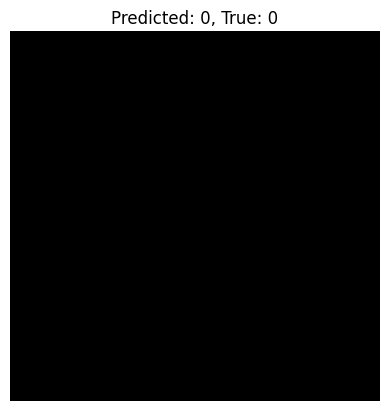

In [ ]:
# 3. Evaluate Model
loss, acc = model.evaluate(test_data)
print(f"Test Accuracy: {acc:.2f}")

# 4. Predict a sample image
def predict_sample(index=0):
    img_batch, label_batch = test_data[index]
    img = img_batch[0]
    label = label_batch[0]

    pred = model.predict(np.expand_dims(img, axis=0), verbose=0)
    pred_label = np.argmax(pred)
    true_label = np.argmax(label)

    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"Predicted: {pred_label}, True: {true_label}")
    plt.axis('off')
    plt.show()

# Predict and visualize
predict_sample(0)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
pd.set_option('display.max_columns', None)

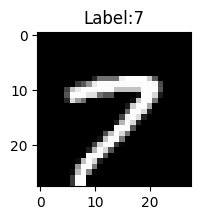

('/content/malayalam_dataset', array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
i = 123
plt.figure(figsize=(2,2))
plt.imshow(x_train[i], cmap='gray')
plt.title(f"Label:{y_train[i]}")
plt.show()
data = '/content/malayalam_dataset',(x_train[i])
print(data)


In [ ]:
shape = x_test.shape
print(shape)

(10000, 28, 28)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model


In [ ]:
# Preprocess the data
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model. add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# print the model summary
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=20,
                    validation_data=(x_test, y_test))

Epoch 1/20


Exception ignored in: <function _xla_gc_callback at 0x7d42e7bb0ae0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step - accuracy: 0.8113 - loss: 4.0212 - val_accuracy: 0.9210 - val_loss: 0.3402
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9311 - loss: 0.2758 - val_accuracy: 0.9333 - val_loss: 0.2323
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9500 - loss: 0.1832 - val_accuracy: 0.9454 - val_loss: 0.2011
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9586 - loss: 0.1446 - val_accuracy: 0.9625 - val_loss: 0.1438
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9636 - loss: 0.1313 - val_accuracy: 0.9605 - val_loss: 0.1488
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9671 - loss: 0.1128 - val_accuracy: 0.9619 - val_loss: 0.1601
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9709 - loss: 0.1018 - val_accuracy: 0.9570 - val_loss: 0.1754
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9729 - loss: 0.0960 - val_ac

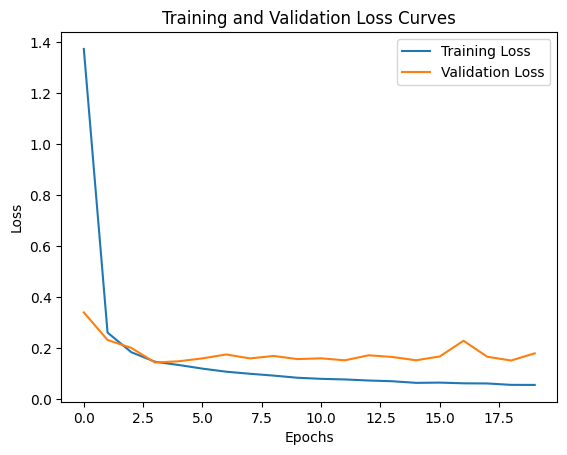

In [ ]:
# Plot train and test loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9639 - loss: 0.2199

Test accuracy: 0.9704


In [ ]:
model.save('my_model.keras')